# Explainable AI Assignment


In [1]:
!pip install pywedge
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install shap

     |████████████████████████████████| 65.8MB 70kB/s 
     | 53.3MB 726kB/s
     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 604kB 8.8MB/s 
     |████████████████████████████████| 3.1MB 8.5MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 296kB 38.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232425 sha256=4f5ece1a01fbe809fcc4d927872c7fbe98a43b4823b74478e9041173fe391e93
  Stored in directory: /tmp/pip-ephem-wheel-cache-su9crrw0/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=dbbcfa83092a3a12d9b714f0c8a935713d51bf73b10a97cd9a07892f3039af22
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling htmlmin
  Found existing installation: tqdm 4.41.1

# Task 1

## Import Libraries

In [2]:
import pandas as pd
import pywedge as pw      # library to perform EDA, make charts
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp   # for EDA

## Load the data
Display the first 5 rows of the data after loading.

In [3]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Perform Basic Exploratory Data Analysis

In [4]:
heart_data.shape

(212, 14)

In [5]:
heart_data.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [6]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,212.0,54.561321,9.493376,29.0,47.00,57.00,61.25,77.0
sex,212.0,0.688679,0.464130,0.0,0.00,1.00,1.00,1.0
cp,212.0,0.915094,1.008193,0.0,0.00,1.00,2.00,3.0
trestbps,212.0,132.127358,17.440700,94.0,120.00,130.00,140.00,192.0
chol,212.0,247.830189,53.199877,126.0,211.75,240.50,277.00,564.0
fbs,212.0,0.165094,0.372144,0.0,0.00,0.00,0.00,1.0
restecg,212.0,0.537736,0.527437,0.0,0.00,1.00,1.00,2.0
thalach,212.0,148.995283,23.332645,71.0,132.00,151.50,165.25,202.0
exang,212.0,0.330189,0.471394,0.0,0.00,0.00,1.00,1.0
oldpeak,212.0,1.008491,1.141681,0.0,0.00,0.65,1.60,5.6


In [7]:
# Using pywedge make_charts
df = heart_data.copy()
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

df1 = df[cat_cols].astype('object')
df.drop(cat_cols, axis=1, inplace=True)

df2 = pd.concat([df, df1], axis=1)

In [8]:
mc = pw.Pywedge_Charts(df2, c=None, y = 'target')
charts = mc.make_charts()

In [9]:
profile = pp.ProfileReport(heart_data, title="Pandas Profiling for Heart Data", explorative=True)

In [10]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

## Separate the Input and Target Features of the data

In [11]:
X = heart_data.drop(['target'], axis=1)
y = heart_data['target']

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scale your data if required

In [13]:
from sklearn.preprocessing import StandardScaler
X_train_scaler = StandardScaler().fit_transform(X_train)
X_test_scaler = StandardScaler().fit_transform(X_test)

# have a look at train standardized data
X_train_scaled_df = pd.DataFrame(data=X_train_scaler)
X_train_scaled_df.columns= X_train.columns

# have a look at train standardized data
X_test_scaled_df = pd.DataFrame(data=X_test_scaler)
X_test_scaled_df.columns= X_test.columns


# train data after scaling
X_train_scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.395363,0.675941,-0.908917,1.112438,0.384299,-0.406838,-1.069425,-1.636932,1.420513,-0.126865,0.919145,-0.714286,1.096144
1,-0.421962,-1.479419,-0.908917,-1.191508,0.086720,-0.406838,-1.069425,0.377754,-0.703971,-0.853650,0.919145,-0.714286,-0.557859
2,-0.217631,0.675941,-0.908917,-1.076311,-0.359648,-0.406838,0.853265,0.419726,-0.703971,-0.853650,0.919145,0.214286,-0.557859
3,1.621350,0.675941,1.209800,1.688424,0.365700,-0.406838,0.853265,-1.594960,1.420513,1.780947,-0.787839,0.214286,1.096144
4,-0.013300,-1.479419,1.209800,-1.191508,-0.657226,-0.406838,0.853265,0.335781,-0.703971,0.599920,-0.787839,-0.714286,-0.557859


# Task 2

## Build a Logistic Regression Model on train set

In [14]:
# import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(max_iter=10000)

# fit the training data
logit_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate the model using F1 Score

In [15]:
predictions = logit_model.predict(X_test)

In [16]:
from sklearn.metrics import f1_score, accuracy_score

print(f'accuracy score :- {round(accuracy_score(Y_test, predictions), 4) * 100} %')
print(f'f1-score is :- {round(f1_score(Y_test, predictions), 4) * 100} %')

accuracy score :- 83.72 %
f1-score is :- 86.27 %


In [17]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

In [18]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [19]:
predictions = logit_model.predict(test_data)

In [20]:
predictions

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1])

In [21]:
pd.DataFrame(predictions, columns=["prediction"]).to_csv('Predictions_XAI.csv', index=0)

In [22]:
X_test.reset_index(drop=['index'], inplace=True)

# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [23]:
import shap

explainer = shap.Explainer(logit_model, X_train)
shap_values = explainer.shap_values(X_test)

pd.DataFrame(shap_values, columns=X_test.columns).head()

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.078852,-0.237273,1.127093,-0.263040,-0.006453,-0.034469,-0.516457,0.484178,0.457364,0.395216,0.258940,0.314523,0.325445
1,-0.021725,0.528123,1.127093,0.041053,-0.005658,0.003409,-0.516457,-1.137315,0.457364,0.395216,0.258940,0.314523,2.736151
2,0.018506,0.528123,0.155461,-0.060312,0.014385,0.003409,0.316538,0.516608,0.457364,-0.269944,0.258940,0.314523,0.325445
3,-0.263109,-0.237273,0.155461,0.497192,-0.002636,0.003409,0.316538,0.095019,0.457364,0.395216,0.258940,0.314523,0.325445
4,0.199545,-0.237273,2.098724,-1.023273,-0.003908,0.003409,-0.516457,0.159879,0.457364,0.062636,-0.291996,0.314523,-0.879908


In [24]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,58,1,2,140,211,1,0,165,0,0.0,2,0,2
1,53,0,2,128,216,0,0,115,0,0.0,2,0,0
2,55,0,1,132,342,0,1,166,0,1.2,2,0,2
3,41,1,1,110,235,0,1,153,0,0.0,2,0,2
4,64,1,3,170,227,0,0,155,0,0.6,1,0,3


In [25]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Base Value:', explainer.expected_value)

Base Value: 0.29825029891437554


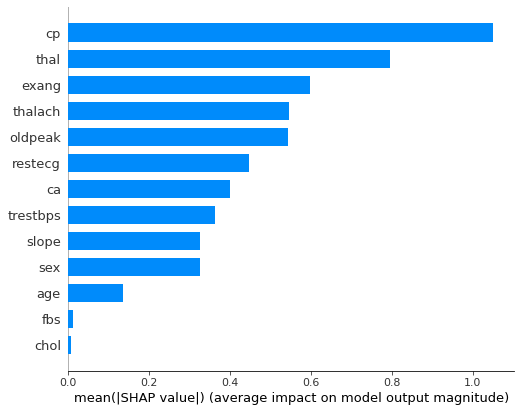

In [26]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

## Write your inferences from the generated plot.

From the above plot, it can be understood that **cp (chest pain type)** and **thal (defect)** are the top 2 important feature for predicting **heart disease**.

While **fbs (fasting blood sugar)** and **chol (cholestrol)** contribute least.

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [27]:
# So, from here we can see that first patient has heart disease. Now, to see what features contributes to heart disease, will be using force_plot.
Y_test.values[0]

1

In [28]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0, :])

## Write your inferences from the generated plot.

As from the above force plot, the **final value = 2.68** is much higher than the **base value = 0.29**. Thus, it is classified that **the patient has heart disease**.

Also it can be observed that, all the feature appearing in red i.e. 

> slope, ca, thal, oldpeak, exang, thalach and **cp** having comparatively higher magnitude.

contribute more to the prediction that patient has heart disease while restecg, trestbps, sex contribute in opposite direction with **restecg** having maximum magnitude.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [29]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values, X_test)

## Write your inferences from the generated plot.

The *default visualization* (**sample order by similarity** i.e putting the patients having the most similar features together) shows following model prediction pattern decisions:

---
---

1. 6 out of first 7 test samples have Heart disease, and they suffer from either chest pain type (cp) 2 or 3, exang=0 and thalach=178

2. For test samples in the range 8 - 30, cp = 0, along with thal=3, and exang=1 contributing more towards the prediction of no heart disease.

3. Most of the patients in 30+ test sample have heart disease with cp=2, exang=0, thal=2





# Task 6

## Plot a SHAP summary plot using all the features in the data

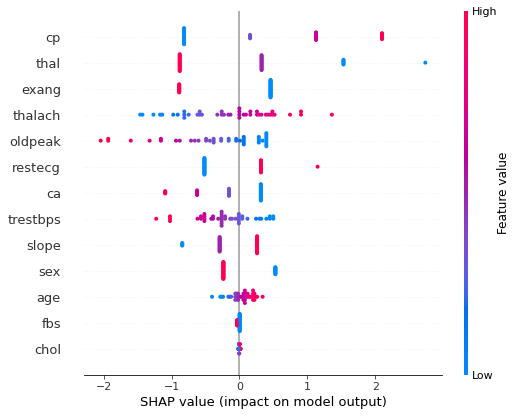

In [30]:
shap.summary_plot(shap_values, X_test)

In the above plot, all the features in X_test are provided to the Summary Plot.

1. From the above it can be understood that features like cp, thal and exang contribute more to the model impact.
2. Higher the chest pain type while lower the thal value higher are the chances of patient being prone to heart disease.




# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

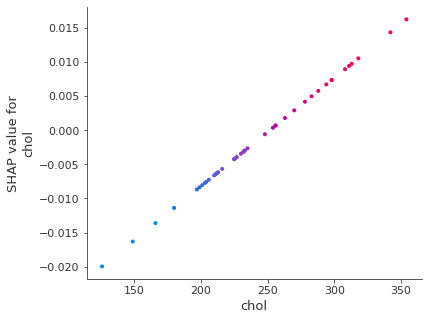

In [31]:
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values, 
                     features=X_test)

As we can see, Higher chol levels have higher shap values, pushing the model’s prediction decisions to say that these patients may be prone to have heart disease as compared to patients with lower chol levels.

# Task 8 (Optional)

## Do anything and everything with SHAP


#### **Bar Plot** -- Passing a matrix of SHAP values X_test to the bar plot function creates a global feature importance plot, where the global importance of each feature is taken to be the mean absolute value for that feature over all the given samples.

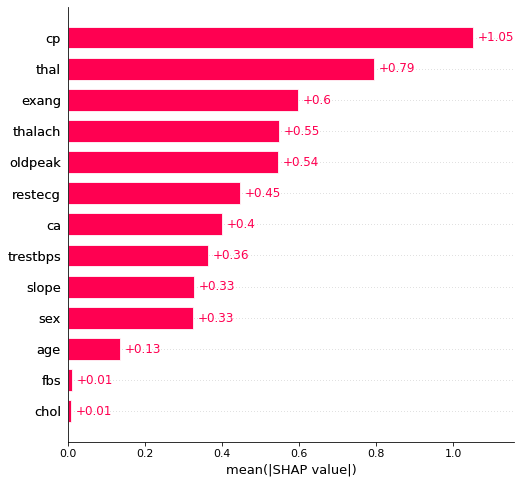

In [32]:
shap.plots.bar(explainer(X_test), max_display=15)

As observed from the above plot, cp and thal are the top 2 features while fbs and chol are the least important.

### **Heatmap**  --- It creates a plot with the instances on the x-axis, the model inputs on the y-axis, and the SHAP values encoded on a color scale. By default the samples are ordered using shap.order.hclust, which orders the samples based on a hierarchical clustering by their explanation similarity.

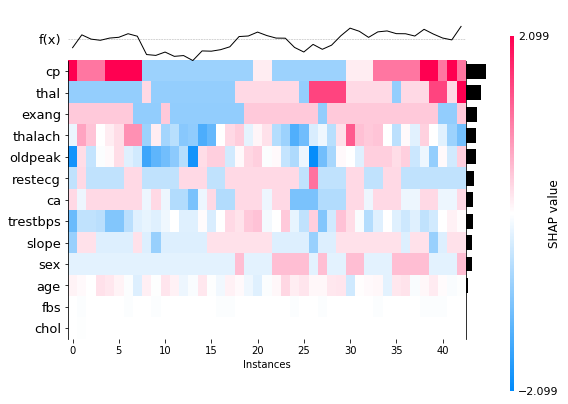

In [33]:
shap.plots.heatmap(explainer(X_test), max_display=14)

From the above we can see that patients with comparatively high cp and thal are mostly prone to heart disease.

### **Waterfall** --- It display explanations for individual predictions, so single row of an Explanation object is provided as an input. The bottom of a waterfall plot starts as the EV/base value/reference value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

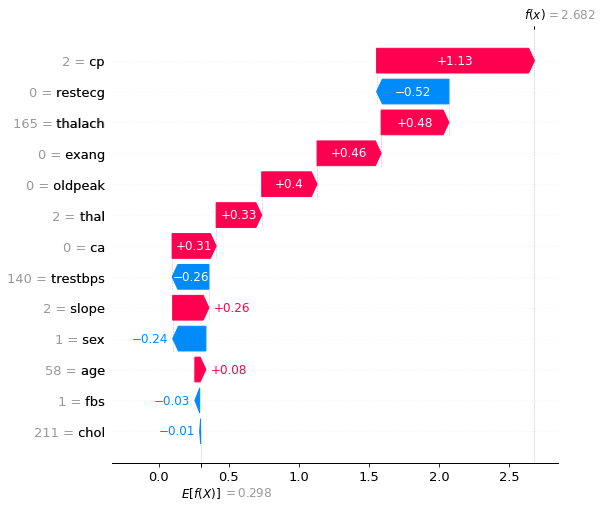

In [34]:
shap.plots.waterfall(explainer(X_test)[0], max_display=20)